In [17]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

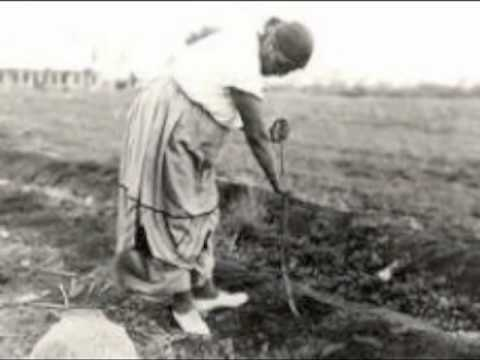

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")


In [19]:
data= pd.read_csv('C:/Users/codedoor-013/Desktop/death/diabetes.csv')

display(data.head())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Additional details about the attributes**


* **Pregnancies**: Number of times pregnant

* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* **BloodPressure**: Diastolic blood pressure (mm Hg)

* **SkinThickness**: Triceps skin fold thickness (mm)

* **Insulin**: 2-Hour serum insulin (mu U/ml)

* **BMI**: Body mass index (weight in kg/(height in m)^2)

* **DiabetesPedigreeFunction**: Diabetes pedigree function

* **Age**: Age (years)

* **Outcome**: Class variable (0 or 1)

In [20]:
# Total number of rows and columns

data.shape




(768, 9)

In [21]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [22]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

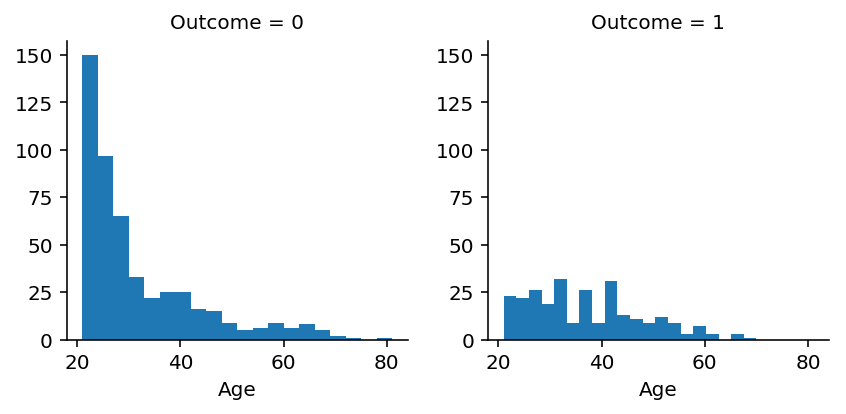

In [34]:
g = sns.FacetGrid(data, col='Outcome')
g.map(plt.hist, 'Age', bins=20)

In [24]:
data.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F082E10>,
      dtype=object)

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [28]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [32]:
corr = data[data.columns].corr()

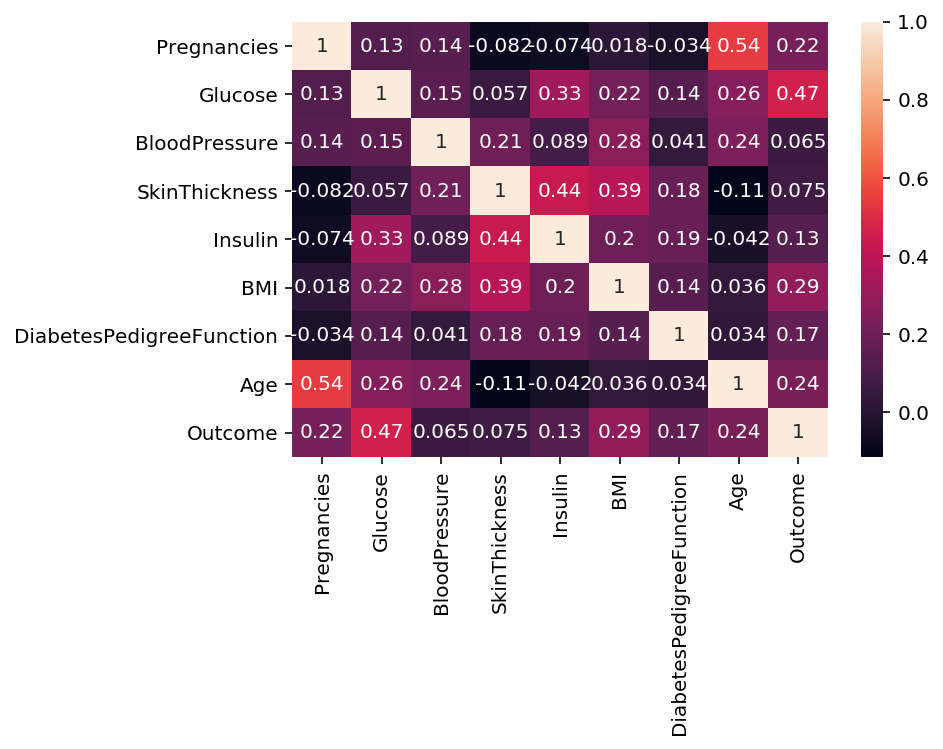

In [33]:
sns.heatmap(corr, annot = True)

### Extract the best features



In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:8]
Y = data.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

fit = select_top_4.fit(X,Y)
features = fit.transform(X)


In [37]:
features[0:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [38]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**So, the top performing features are Glucose, Insulin, BMI, Age**

In [39]:
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])
X_features.head()

Glucose  Insulin   BMI   Age
0    148.0      0.0  33.6  50.0
1     85.0      0.0  26.6  31.0
2    183.0      0.0  23.3  32.0
3     89.0     94.0  28.1  21.0
4    137.0    168.0  43.1  33.0

In [41]:
Y = data.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [43]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

Glucose   Insulin       BMI       Age
0  0.848324 -0.692891  0.204013  1.425995
1 -1.123396 -0.692891 -0.684422 -0.190672
2  1.943724 -0.692891 -1.103255 -0.105584
3 -0.998208  0.123302 -0.494043 -1.041549
4  0.504055  0.765836  1.409746 -0.020496

# Binary Classification

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [45]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [46]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

('LR', 0.7768905341089372)
('NB', 0.7604970914859862)
('KNN', 0.7459280803807509)
('DT', 0.7118455843469065)
('SVM', 0.776890534108937)


[Text(0,0,u'LR'),
 Text(0,0,u'NB'),
 Text(0,0,u'KNN'),
 Text(0,0,u'DT'),
 Text(0,0,u'SVM')]

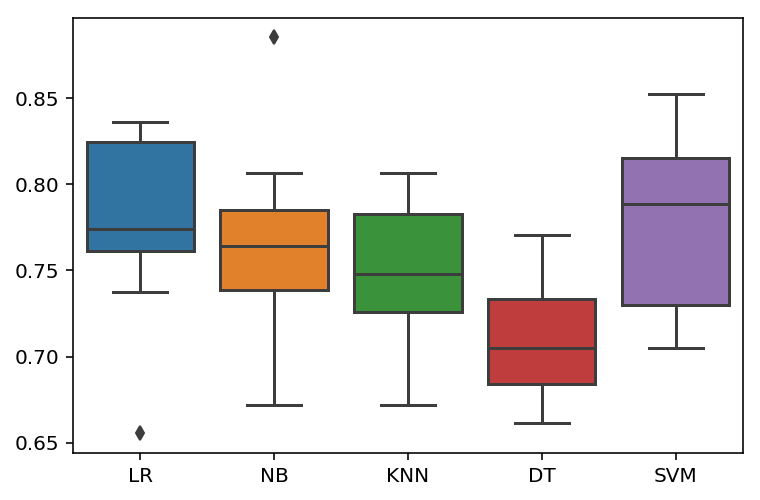

In [53]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)


# Final Prediction using Test Data

In [54]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(accuracy_score(Y_test,predictions))

0.7142857142857143


In [56]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.7337662337662337


In [57]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



In [58]:
conf = confusion_matrix(Y_test,predictions)

In [59]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)